### K nearest neighbours
- It's a supervised learning algorithm
- It can be used for both classification (max vote) and regression (mean)
What it basically means is if a new data is produced it takes vote/mean from k nearest neighbours and the majority votes / mean determines its class/value.

#### From scratch

In [44]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for featurea, featureb in zip(row1, row2):
		distance += (featurea - featureb)**2
	return distance**0.5

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

X, y = df.drop('species', axis=1).to_numpy(), le.fit_transform(df['species'])
X.shape, y.shape

((150, 4), (150,))

In [17]:
euclidean_distance(X.iloc[0], X.iloc[1])

0.5385164807134502

In [33]:
# Locate the most similar neighbors
def get_neighbors(X, y, test_row, num_neighbors):
	distances = list()
	for trainX, trainY in zip(X,y):
		dist = euclidean_distance(test_row, trainX)
		distances.append((trainY, dist))
	distances.sort(key=lambda x: x[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

neighbors = get_neighbors(X, y, X[0], 3)
y_pred = max(set(neighbors), key=neighbors.count)
print(y_pred, le.classes_[y_pred])

0 Iris-setosa


#### above algorithm shows the gist of how knn works now fully functional knn using sklearn library is shown below

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

<Axes: >

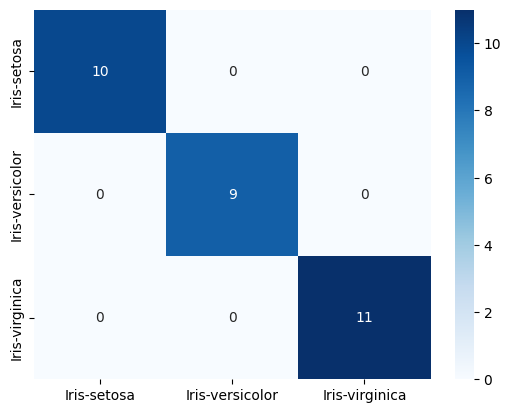

In [43]:
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)